In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [4]:
header = pd.read_csv('./Header.csv')
# 처음부터 다시 데이터를 만들 것인가?
New_load_DB = False

if New_load_DB:
    for _ in os.listdir('./Total_DB/'):
        DB = pd.DataFrame(np.loadtxt('./Total_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
        header = pd.concat((header, DB))
else:
    header = pd.DataFrame(pd.read_csv('tot_db.csv'), columns=header.columns)

In [5]:
des = header.describe()
des

,BFV122,BHV1,BHV101,BHV108,BHV2,BHV208,BHV22,BHV3,BHV308,BHV311,...,ZSGW1,ZSGW2,ZSGW3,FSRMDPM,USUBMA,ZINST1,ZINST17,ZINST2,ZINST3,ZINST46
count,244982.000000,244982.000000,244982.0,244982.000000,244982.000000,244982.000000,244982.000000,244982.0,244982.000000,244982.000000,...,244982.000000,244982.000000,244982.000000,2.449820e+05,244982.000000,244982.000000,244982.000000,244982.000000,244982.000000,244982.000000
mean,0.026071,0.045728,0.0,0.093922,0.045728,0.093922,0.498314,0.0,0.093922,0.973101,...,6.951259,6.779299,6.441462,-2.926887e+02,24.804459,4.273166,0.597258,-8.608793,0.947179,240.628243
std,0.123582,0.207692,0.0,0.290862,0.207692,0.290862,0.499708,0.0,0.290862,0.093690,...,2.707714,2.714360,2.343627,2.772152e+04,34.091013,19.711357,0.727222,2.146046,1.384936,48.185374
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,-0.440000,-0.780000,-0.560000,-4.988283e+06,-6.730000,0.000000,0.000000,-11.000000,0.000000,51.330000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.960000,...,4.940000,4.890000,4.930000,-3.000000e-01,-0.650000,0.000000,0.000000,-11.000000,0.000000,218.582500
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,...,6.010000,6.060000,5.630000,-2.000000e-02,10.550000,0.000000,0.330000,-8.810000,0.000000,259.070000
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,...,8.650000,8.380000,7.550000,-0.000000e+00,39.930000,0.020000,0.890000,-7.010000,1.920000,268.380000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,18.750000,15.600000,13.630000,5.210000e+00,200.280000,103.170000,4.390000,-3.340000,4.350000,326.200000


In [6]:
Tot_minmax = des.loc[['min', 'max']] # 전체 변수에 대한 minmax값
Tot_minmax

,BFV122,BHV1,BHV101,BHV108,BHV2,BHV208,BHV22,BHV3,BHV308,BHV311,...,ZSGW1,ZSGW2,ZSGW3,FSRMDPM,USUBMA,ZINST1,ZINST17,ZINST2,ZINST3,ZINST46
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.44,-0.78,-0.56,-4988283.00,-6.73,0.00,0.00,-11.00,0.00,51.33
max,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,18.75,15.60,13.63,5.21,200.28,103.17,4.39,-3.34,4.35,326.20


In [7]:
# MinmaxScaler를 활용한 노멀라이제이션
scaler = MinMaxScaler()
scaler.fit(Tot_minmax)
norm_db = scaler.transform(header.values)
norm_db.shape

(244982, 168)

In [8]:
norm_db = pd.DataFrame(norm_db, columns=header.columns)
norm_db.head()

,BFV122,BHV1,BHV101,BHV108,BHV2,BHV208,BHV22,BHV3,BHV308,BHV311,...,ZSGW1,ZSGW2,ZSGW3,FSRMDPM,USUBMA,ZINST1,ZINST17,ZINST2,ZINST3,ZINST46
0,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830891,0.943622,0.999999,0.120622,0.967045,0.0,0.998695,0.0,0.997854
1,0.57,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830891,0.943622,0.999999,0.120526,0.966754,0.0,0.998695,0.0,0.997926
2,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830281,0.942918,0.999999,0.121105,0.969759,0.0,0.998695,0.0,0.997599
3,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830281,0.942918,0.999999,0.120815,0.970243,0.0,0.998695,0.0,0.997417
4,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830281,0.943622,0.999999,0.120960,0.969177,0.0,0.998695,0.0,0.997490


In [38]:
all_db_load = False

# 선택할 변수 선정
input_value = ['BHV311', 'BPSV10', 'BPSV5', 'BV102', 'BV202', 'BV302', 'KCHRGP1', 'KCHRGP3', 'KCTMTSP', 'KLAMPO121',
               'KLAMPO123', 'KLAMPO47', 'KSWO125', 'WPRZSV', 'ZSGW1', 'ZSGW2', 'ZSGW3', 'KBCDO23', 'KZBANK1', 'KZBANK2', 
               'KZBANK3', 'KZBANK4', 'KZBANK5', 'KZBANK6', 'KZBANK7', 'KZBANK8', 'QPROREL', 'QPRZB', 'QPRZP', 'UAVLEG1', 
               'UAVLEG2', 'UAVLEG3', 'UAVLEGM', 'UCOLEG1', 'UCOLEG2', 'UCOLEG3', 'UHOLEG1', 'UHOLEG2', 'UHOLEG3', 'WACCA', 
               'WACCB', 'WHV22', 'WSPRAY', 'WSPRCS1', 'WSPRCS2', 'WSTM1', 'WSTM2', 'WSTM3', 'ZINST101', 'ZINST22', 'ZINST25', 
               'ZINST26', 'ZINST42', 'ZINST56', 'ZINST57', 'ZINST58', 'ZINST62', 'ZINST65', 'ZINST66', 'ZINST70', 'ZINST71', 
               'ZINST72', 'ZINST73', 'ZINST74', 'ZINST75', 'ZINST76', 'ZINST77', 'ZINST78', 'ZINST89', 'ZINST91', 'ZINST92', 
               'ZINST93', 'ZINST94', 'ZINST95', 'ZINST96', 'ZINST99', 'ZPRZ', 'ZREAC']
output_value = ['BFV122', 'BHV1', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV614',
                'BLV615', 'BPORV', 'BPRZSP', 'BV101', 'BV201', 'BV301', 'KAFWP1', 'KAFWP2', 'KAFWP3', 'KBHON',
                'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124', 'KLAMPO125', 'KLAMPO126',
                'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO', 'KOHV22', 'KOLV615', 'KPBHM',
                 'KRXTRIP', 'KSWO120']

input_length = 10
Norm_DB_input_train_DB = []
Norm_DB_output_train_DB = []

Norm_DB_input_test_DB = []
Norm_DB_output_test_DB = []

for _ in os.listdir('./Train_DB/'):
    #단일 데이터 읽어 오기
    DB = pd.DataFrame(np.loadtxt('./Train_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
    Norm_DB = pd.DataFrame(scaler.transform(DB.values), columns=header.columns)

    # 데이터 분할
    Norm_DB_input = Norm_DB[input_value]
    Norm_DB_output = Norm_DB[output_value]
    # 10개 시간 스텝으로 분할하여 저장
    for i in range(0, Norm_DB_input.shape[0] - input_length -1):
        # input DB
        Seqence_data = Norm_DB_input.iloc[i : i + input_length].values
        Norm_DB_input_train_DB.append(Seqence_data)
        # output DB
        Seqence_data = Norm_DB_output.iloc[i + input_length + 1].values
        Norm_DB_output_train_DB.append(Seqence_data)
        
    # 테스트용 break
    if not all_db_load:
        print('단일 데이터만 읽었습니다.')
        break
        
for _ in os.listdir('./Test_DB/'):
    #단일 데이터 읽어 오기
    DB = pd.DataFrame(np.loadtxt('./Test_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
    Norm_DB = pd.DataFrame(scaler.transform(DB.values), columns=header.columns)

    # 데이터 분할
    Norm_DB_input = Norm_DB[input_value]
    Norm_DB_output = Norm_DB[output_value]
    # 10개 시간 스텝으로 분할하여 저장
    for i in range(0, Norm_DB_input.shape[0] - input_length -1):
        # input DB
        Seqence_data = Norm_DB_input.iloc[i : i + input_length].values
        Norm_DB_input_test_DB.append(Seqence_data)
        # output DB
        Seqence_data = Norm_DB_output.iloc[i + input_length + 1].values
        Norm_DB_output_test_DB.append(Seqence_data)
        
    # 테스트용 break
    if not all_db_load:
        print('단일 데이터만 읽었습니다.')
        break

단일 데이터만 읽었습니다.
단일 데이터만 읽었습니다.


# 네트워크 파트

In [39]:
import tensorflow as tf
import numpy as np

Shape_trina_DB = np.shape(Norm_DB_input_train_DB) # (None, 10, 78)

input_layer = tf.keras.Input(batch_shape=(None, Shape_trina_DB[1], Shape_trina_DB[2]))
L_model = tf.keras.models.Sequential([
    tf.keras.layers.CuDNNLSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.CuDNNLSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.3)
])

model = L_model(input_layer)

out_layer = []
for i in range(0,1):
    out_layer.append(tf.keras.layers.Dense(40)(model))

fin_model = tf.keras.Model(inputs=input_layer, outputs=out_layer)

fin_model.summary()

fin_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 10, 78)            0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 32)                72224     
_________________________________________________________________
dense_9 (Dense)              (None, 40)                1320      
Total params: 73,544
Trainable params: 73,544
Non-trainable params: 0
_________________________________________________________________


In [40]:
hist = fin_model.fit([Norm_DB_input_train_DB], [Norm_DB_output_train_DB], epochs=10, batch_size=10)

Epoch 1/10
2063/2063 [==============================] - 3s 1ms/step - loss: 0.1246 - acc: 0.0451
Epoch 2/10
2063/2063 [==============================] - 1s 700us/step - loss: 0.0520 - acc: 0.0606
Epoch 3/10
2063/2063 [==============================] - 1s 709us/step - loss: 0.0365 - acc: 0.0577
Epoch 4/10
2063/2063 [==============================] - 1s 708us/step - loss: 0.0293 - acc: 0.0582
Epoch 5/10
2063/2063 [==============================] - 1s 714us/step - loss: 0.0257 - acc: 0.0548
Epoch 6/10
2063/2063 [==============================] - 1s 711us/step - loss: 0.0238 - acc: 0.0480
Epoch 7/10
2063/2063 [==============================] - 1s 716us/step - loss: 0.0216 - acc: 0.0514
Epoch 8/10
2063/2063 [==============================] - 1s 727us/step - loss: 0.0202 - acc: 0.0499
Epoch 9/10
2063/2063 [==============================] - 1s 714us/step - loss: 0.0187 - acc: 0.0441
Epoch 10/10
2063/2063 [==============================] - 1s 722us/step - loss: 0.0178 - acc: 0.0451


In [41]:
out=fin_model.predict([Norm_DB_input_test_DB])

In [42]:
np.shape(out)

(854, 40)

In [43]:
Out_db = pd.DataFrame(out, columns=Norm_DB_output.columns)
Real_db = pd.DataFrame(Norm_DB_output_test_DB, columns=Norm_DB_output.columns)

In [44]:
Out_db

,BFV122,BHV1,BHV108,BHV2,BHV208,BHV22,BHV308,BHV6,BLV459,BLV614,...,KLAMPO4,KLAMPO48,KLAMPO49,KLAMPO50,KMSISO,KOHV22,KOLV615,KPBHM,KRXTRIP,KSWO120
0,0.505208,0.888039,0.854322,0.899313,0.853087,-0.087887,0.862089,0.340250,0.884041,0.694295,...,-0.078473,-0.094336,0.880344,-0.128002,-0.117302,-0.066549,-0.165438,-0.013161,0.021569,0.008862
1,0.505603,0.888739,0.854842,0.900054,0.853536,-0.088995,0.862567,0.340816,0.884751,0.694131,...,-0.079507,-0.095180,0.881016,-0.129119,-0.118198,-0.067562,-0.166650,-0.012351,0.020603,0.009780
2,0.505617,0.888819,0.855603,0.900144,0.854281,-0.089301,0.863300,0.340259,0.884830,0.694014,...,-0.079732,-0.096029,0.881034,-0.129347,-0.119164,-0.067763,-0.166953,-0.011403,0.020507,0.010856
3,0.505452,0.888600,0.856387,0.899923,0.855076,-0.089210,0.864066,0.339291,0.884608,0.693926,...,-0.079560,-0.096794,0.880747,-0.129145,-0.120061,-0.067573,-0.166812,-0.010459,0.020817,0.011930
4,0.505245,0.888310,0.857151,0.899626,0.855859,-0.089009,0.864817,0.338238,0.884312,0.693853,...,-0.079285,-0.097507,0.880388,-0.128829,-0.120905,-0.067279,-0.166552,-0.009564,0.021229,0.012948
5,0.505016,0.887983,0.857916,0.899290,0.856646,-0.088754,0.865570,0.337114,0.883978,0.693787,...,-0.078958,-0.098202,0.879991,-0.128455,-0.121731,-0.066934,-0.166230,-0.008694,0.021696,0.013936
6,0.504776,0.887628,0.858637,0.898922,0.857395,-0.088441,0.866283,0.335948,0.883617,0.693737,...,-0.078576,-0.098837,0.879573,-0.128024,-0.122484,-0.066538,-0.165846,-0.007904,0.022211,0.014830
7,0.504541,0.887284,0.859352,0.898565,0.858138,-0.088137,0.866991,0.334771,0.883265,0.693687,...,-0.078207,-0.099465,0.879166,-0.127604,-0.123230,-0.066152,-0.165470,-0.007152,0.022715,0.015681
8,0.504308,0.886941,0.860017,0.898208,0.858831,-0.087826,0.867650,0.333619,0.882915,0.693641,...,-0.077835,-0.100043,0.878764,-0.127182,-0.123919,-0.065764,-0.165089,-0.006469,0.023210,0.016452
9,0.504083,0.886606,0.860638,0.897859,0.859480,-0.087515,0.868267,0.332496,0.882573,0.693600,...,-0.077468,-0.100578,0.878375,-0.126766,-0.124556,-0.065382,-0.164709,-0.005852,0.023693,0.017146


In [45]:
Real_db

,BFV122,BHV1,BHV108,BHV2,BHV208,BHV22,BHV308,BHV6,BLV459,BLV614,...,KLAMPO4,KLAMPO48,KLAMPO49,KLAMPO50,KMSISO,KOHV22,KOLV615,KPBHM,KRXTRIP,KSWO120
0,0.57,1.00,1.0,1.00,1.0,0.00,1.0,1.0,1.00,0.945055,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.57,1.00,1.0,1.00,1.0,0.00,1.0,1.0,1.00,0.945055,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.57,1.00,1.0,1.00,1.0,0.00,1.0,1.0,1.00,0.934066,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.56,1.00,1.0,1.00,1.0,0.00,1.0,1.0,1.00,0.934066,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.56,1.00,1.0,1.00,1.0,0.00,1.0,1.0,1.00,0.934066,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.56,1.00,1.0,1.00,1.0,0.00,1.0,1.0,1.00,0.923077,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.56,1.00,1.0,1.00,1.0,0.00,1.0,1.0,1.00,0.923077,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.56,1.00,1.0,1.00,1.0,0.00,1.0,1.0,1.00,0.912088,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.56,1.00,1.0,1.00,1.0,0.00,1.0,1.0,1.00,0.912088,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.56,1.00,1.0,1.00,1.0,0.00,1.0,1.0,1.00,0.901099,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


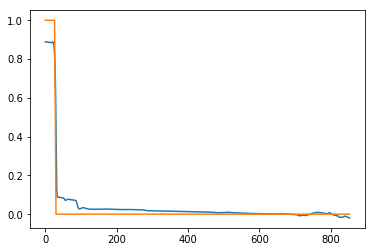

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(Out_db['BHV1'])
plt.plot(Real_db['BHV1'])
plt.show()